<a href="https://colab.research.google.com/github/Hari25483/Python-Machine-Learning/blob/master/E18128_CO544_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sample data from a mixture Gaussian density and implement K−means clustering algorithm.
Snippet of code is provided in Appendix to randomly set means, covariances and proportions to
define a model, and to sample from it (for K = 3). You have to write code for the K−means
iterations yourself. The implementation of your algorithm should produce results similar to that
in Fig. 1.

In [25]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_spd_matrix
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N, 2)
    return U @ A.T + m
def kmeans(X, K, max_iters=100):
    N, _ = X.shape
    # Randomly initialize cluster centroids
    idx = np.random.choice(N, K, replace=False)
    centroids = X[idx]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of the assigned data points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids
# Define means, covariances, and proportions for the mixture model
Means = np.array([[0, 3], [3, 0], [4, 4]])
CovMatrices = np.zeros((3, 2, 2))
for j in range(3):
    CovMatrices[j, :, :] = make_spd_matrix(2)
w = np.random.rand(3)
w = w / np.sum(w)

# Generate data from the mixture model
nData = np.floor(w * 1000).astype(int)
X0 = genGaussianSamples(nData[0], Means[0, :], CovMatrices[0, :, :])
X1 = genGaussianSamples(nData[1], Means[1, :], CovMatrices[1, :, :])
X2 = genGaussianSamples(nData[2], Means[2, :], CovMatrices[2, :, :])
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)

# Perform K-means clustering
K = 3
labels, centroids = kmeans(X, K)

# Print the cluster labels and centroids
# print("Cluster Labels:", labels)
print("Cluster Centroids:")
for k in range(K):
    print("Cluster", k+1, ":", centroids[k])


Cluster Centroids:
Cluster 1 : [4.30078845 3.84434163]
Cluster 2 : [-0.05408819  3.0699038 ]
Cluster 3 : [ 3.02648478 -0.1460413 ]


 2. Draw contours on the probability density you have used and compare with regions associated with each cluster.

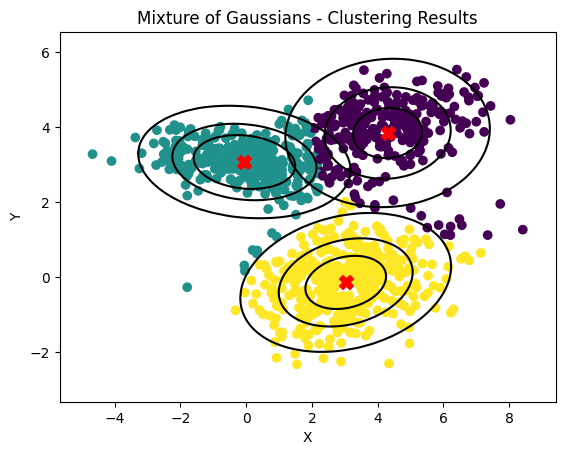

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_density_contours(X, labels, centroids):
    # Set the range of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Plot the data points and cluster centroids
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=100)
    
    # Plot the probability density contours for each cluster
    for k, centroid in enumerate(centroids):
        cov_matrix = np.cov(X[labels == k].T)
        density = multivariate_normal(mean=centroid, cov=cov_matrix)
        prob_density = density.pdf(np.dstack((xx, yy)))
        plt.contour(xx, yy, prob_density, levels=[0.01, 0.05, 0.1], colors='black')
    
    # Set the plot limits and labels
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Mixture of Gaussians - Clustering Results')
    
    # Show the plot
    plt.show()

plot_density_contours(X, labels, centroids)


3. Compare your results with the K−means clustering algorithm in sklearn.

Cluster Centroids:
Cluster 1 : [ 4.27845635 -0.00867796]
Cluster 2 : [-0.29127743  3.01578827]
Cluster 3 : [1.94096321 0.24618205]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Scikit-Learn - Cluster Centroids:
Cluster 1 : [ 4.27102538 -0.00960938]
Cluster 2 : [-0.29127743  3.01578827]
Cluster 3 : [1.93421718 0.24860722]


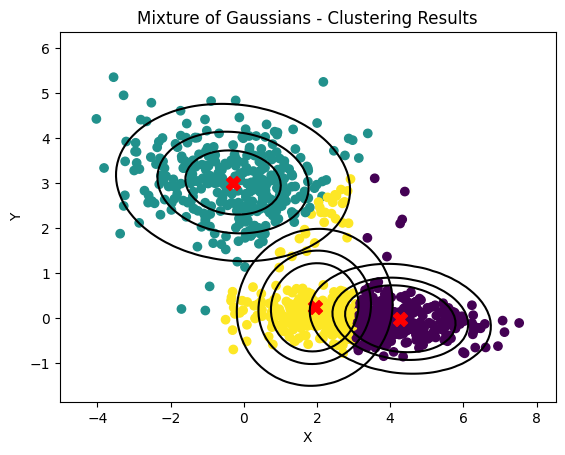

In [27]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Your code for generating data and implementing K-means
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_spd_matrix

def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N, 2)
    return U @ A.T + m

def kmeans(X, K, max_iters=100):
    N, _ = X.shape
    # Randomly initialize cluster centroids
    idx = np.random.choice(N, K, replace=False)
    centroids = X[idx]
    
    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = cdist(X, centroids)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids based on the mean of the assigned data points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Define means, covariances, and proportions for the mixture model
Means = np.array([[0, 3], [3, 0], [4, 4]])
CovMatrices = np.zeros((3, 2, 2))
for j in range(3):
    CovMatrices[j, :, :] = make_spd_matrix(2)
w = np.random.rand(3)
w = w / np.sum(w)

# Generate data from the mixture model
nData = np.floor(w * 1000).astype(int)
X0 = genGaussianSamples(nData[0], Means[0, :], CovMatrices[0, :, :])
X1 = genGaussianSamples(nData[1], Means[1, :], CovMatrices[1, :, :])
X2 = genGaussianSamples(nData[2], Means[2, :], CovMatrices[2, :, :])
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)

# Perform K-means clustering
K = 3
labels, centroids = kmeans(X, K)

# Print the cluster labels and centroids
# print("From my implementation:  Cluster Labels:", labels)
print("Cluster Centroids:")
for k in range(K):
    print("Cluster", k+1, ":", centroids[k])



# ###################################


# Perform K-means clustering using scikit-learn
kmeans_sklearn = KMeans(n_clusters=K)
kmeans_sklearn.fit(X)

# Get the cluster labels and centroids from scikit-learn
labels_sklearn = kmeans_sklearn.labels_
centroids_sklearn = kmeans_sklearn.cluster_centers_

# Print the cluster labels and centroids obtained from scikit-learn
# print("Scikit-Learn - Cluster Labels:", labels_sklearn)
print("Scikit-Learn - Cluster Centroids:")
for k in range(K):
    print("Cluster", k+1, ":", centroids_sklearn[k])

# Compare the results
plot_density_contours(X, labels, centroids)



4)It is said that the K−means algorithm is sensitive to the initial guess of the cluster centers and
the choice of K. Is this the case in your implementation? Show an example of the algorithm
failing.

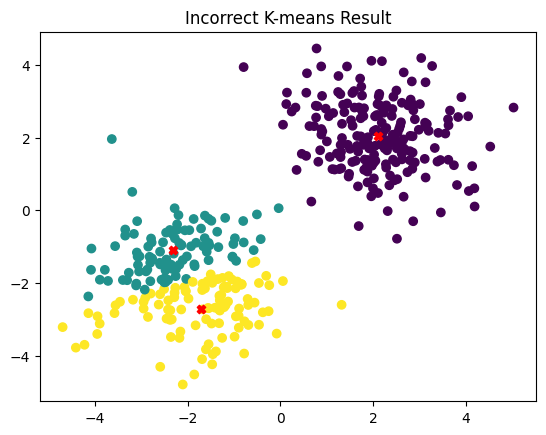

In [28]:
import matplotlib.pyplot as plt

# Generate data with two well-separated clusters
np.random.seed(1)
X = np.vstack((np.random.randn(200, 2) + [2, 2], np.random.randn(200, 2) + [-2, -2]))

# Apply K-means with incorrect K value
K = 3  # Incorrect value
labels, centroids = kmeans(X, K)

# Plot the data and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red')
plt.title("Incorrect K-means Result")
plt.show()






In this example, the data is generated with two well-separated clusters. However, when we use an incorrect value of K (in this case, 3 instead of 2), the K-means algorithm fails to accurately identify the underlying clusters. As a result, the clustering result is suboptimal, with one cluster split into two.

This example highlights the importance of choosing the correct value of K and the impact of the initial guess of cluster centers on the clustering outcome. It's essential to perform careful exploration and evaluation to select appropriate K and consider multiple initializations to mitigate the sensitivity of the K-means algorithm.

5) Select a K−class classification dataset from the UCI repository, cluster the input data using
K−means clustering and check how well the clusters relate to the targets defined in the dataset.

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Select a K-class classification dataset from the UCI repository
dataset = fetch_openml(name='iris', version=1, as_frame=True)
X = dataset.data  # Input features
y_true = dataset.target  # True class labels

# Perform K-means clustering
K = len(np.unique(y_true))  # Number of clusters based on the true class labels
kmeans = KMeans(n_clusters=K, random_state=1)
kmeans.fit(X)
y_pred = kmeans.labels_  # Predicted cluster labels

# Evaluate the clustering performance using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, y_pred)
print("Adjusted Rand Index (ARI): {:.4f}".format(ari))


Adjusted Rand Index (ARI): 0.7302


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



We then perform K-means clustering with the number of clusters (K) equal to the number of unique class labels in the dataset. The predicted cluster labels are stored in the y_pred variable.

Finally, we evaluate the clustering performance using the Adjusted Rand Index (ARI), which measures the similarity between the true class labels and the predicted cluster labels. A higher ARI value indicates better agreement between the clusters and the true class labels.